In [29]:
from datetime import datetime
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
#https://finance.yahoo.com/quote/BTC-USD/history?
# period1=1413417600&
# period2=1700092800&
# interval=1d&filter=history&frequency=1d

In [14]:
def construct_download_url(
    ticker,
    period1,
    period2,
    interval = 'daily'
):
    
    """
    :period1 & period2: "yyyy-mm-dd"
    :interval: {daily, weekly, monthly}
    """
    def convert_to_seconds(period):
        datetime_value = datetime.strptime(period, '%Y-%m-%d')
        total_seconds = int(time.mktime(datetime_value.timetuple())) + 86400
        return total_seconds
    
    try:
        interval_reference ={'daily': '1d', 'weekly' : '1wk', 'monthly' : '1mo'}
        _interval = interval_reference.get(interval)
        if _interval is None:
            print('interval code is incorrect')
            return
        
        p1 = convert_to_seconds(period1)
        p2 = convert_to_seconds(period2)
        url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={p1}&period2={p2}&interval={_interval}&filter=history'
        return url
    
    except Exception as e:
        print(e)
        return

In [15]:
query_url = construct_download_url('BTC-USD', '2017-10-01', '2023-10-01', 'daily')
df = pd.read_csv(query_url)
print(df)

df.set_index('Date', inplace=True)
df.to_csv('Bitcoin Historical Data.cvs')

with open('BTC-USD.json', 'w') as f:
    f.write(json.dumps(df.T.to_dict(), indent=4))

            Date          Open          High           Low         Close  \
0     2017-10-02   4395.810059   4470.229980   4377.459961   4409.319824   
1     2017-10-03   4408.459961   4432.470215   4258.890137   4317.479980   
2     2017-10-04   4319.370117   4352.310059   4210.419922   4229.359863   
3     2017-10-05   4229.879883   4362.640137   4164.049805   4328.410156   
4     2017-10-06   4324.459961   4413.270020   4320.529785   4370.810059   
...          ...           ...           ...           ...           ...   
2187  2023-09-28  26355.812500  27259.500000  26327.322266  27021.546875   
2188  2023-09-29  27024.841797  27225.937500  26721.763672  26911.720703   
2189  2023-09-30  26911.689453  27091.794922  26888.968750  26967.916016   
2190  2023-10-01  26967.396484  28047.238281  26965.093750  27983.750000   
2191  2023-10-02  27976.798828  28494.458984  27347.787109  27530.785156   

         Adj Close       Volume  
0      4409.319824   1431730048  
1      4317.479980 

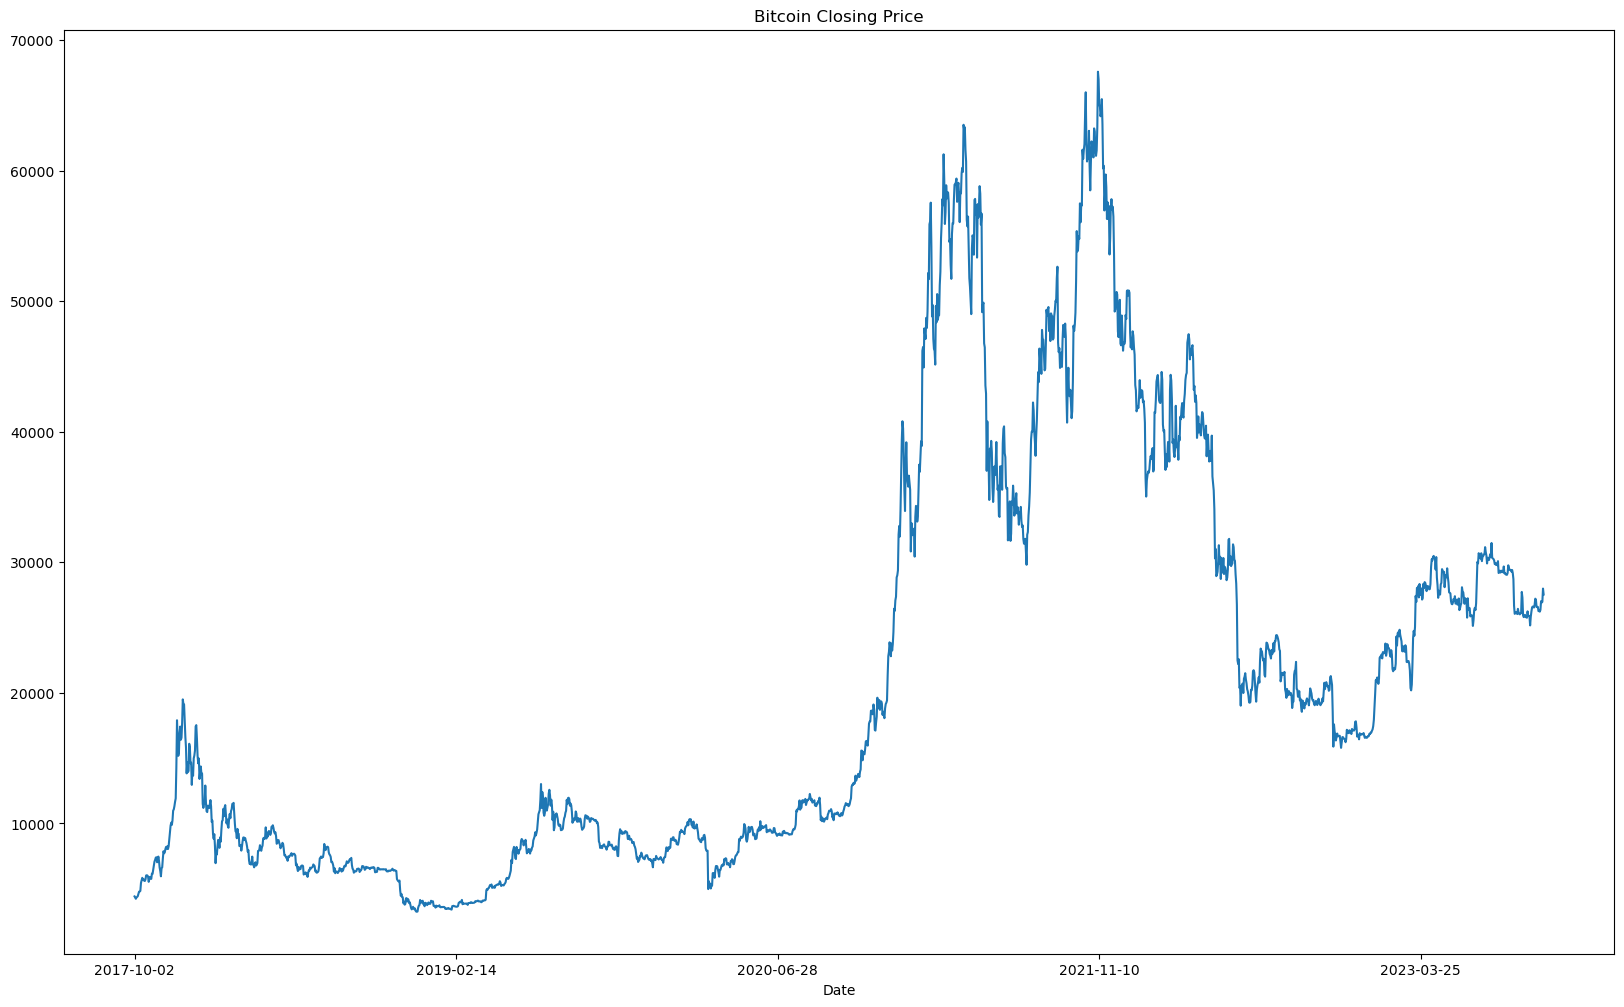

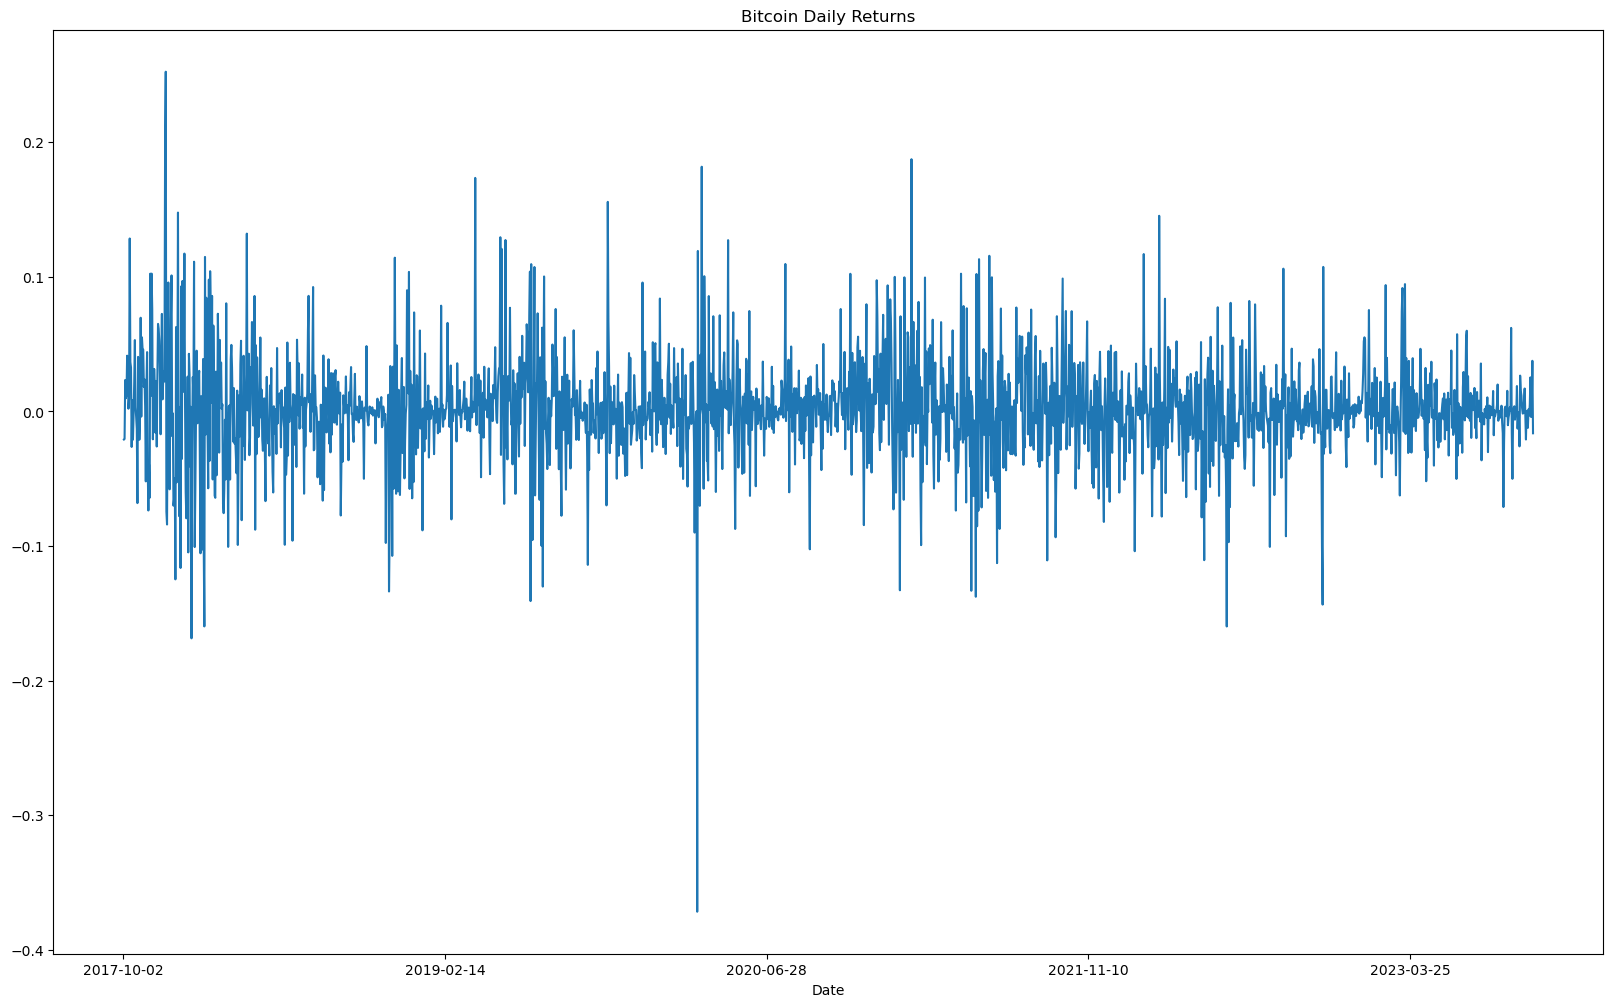

In [16]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate annualized volatility
annualized_volatility = df['Daily_Return'].std() * np.sqrt(252)

# Plotting the closing price
plt.figure(figsize=(20, 12))
df['Close'].plot(title='Bitcoin Closing Price')
plt.show()

# Plotting the daily returns
plt.figure(figsize=(20, 12))
df['Daily_Return'].plot(title='Bitcoin Daily Returns')
plt.show()


In [17]:
# Assuming 'Daily_Return' is already calculated
# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = df['Daily_Return'].std()

# Annualize the daily volatility
annualized_volatility = daily_volatility * np.sqrt(252)  # 252 trading days in a year

# Print the annualized volatility
print("Annualized Volatility of Bitcoin:", annualized_volatility)
print("Annualized Volatility of Bitcoin Percentage: {:.2f}%".format(annualized_volatility * 100))

Annualized Volatility of Bitcoin: 0.6055321516759605
Annualized Volatility of Bitcoin Percentage: 60.55%


In [18]:
# Calculate the average of the daily returns
average_daily_return = df['Daily_Return'].mean()

# Annualize the average daily return
# There are approximately 252 trading days in a year
average_annual_return = np.power(1 + average_daily_return, 252) - 1

# Print the average annual return
print("Average Annual Return of Bitcoin:", average_annual_return)
print("Average Annual Return of Bitcoin Percentage: {:.2f}%".format(average_annual_return * 100))


Average Annual Return of Bitcoin: 0.48514883221701766
Average Annual Return of Bitcoin Percentage: 48.51%


In [19]:
def construct_download_url(
    ticker,
    period1,
    period2,
    interval = 'daily'
):
    
    """
    :period1 & period2: "yyyy-mm-dd"
    :interval: {daily, weekly, monthly}
    """
    def convert_to_seconds(period):
        datetime_value = datetime.strptime(period, '%Y-%m-%d')
        total_seconds = int(time.mktime(datetime_value.timetuple())) + 86400
        return total_seconds
    
    try:
        interval_reference ={'daily': '1d', 'weekly' : '1wk', 'monthly' : '1mo'}
        _interval = interval_reference.get(interval)
        if _interval is None:
            print('interval code is incorrect')
            return
        
        p1 = convert_to_seconds(period1)
        p2 = convert_to_seconds(period2)
        url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={p1}&period2={p2}&interval={_interval}&filter=history'
        return url
    
    except Exception as e:
        print(e)
        return

In [20]:
query_url = construct_download_url('%5EGSPC', '2017-10-01', '2023-10-01', 'daily')
df = pd.read_csv(query_url)
print(df)

df.set_index('Date', inplace=True)
df.to_csv('SP500.cvs')

with open('SP500.json', 'w') as f:
    f.write(json.dumps(df.T.to_dict(), indent=4))

            Date         Open         High          Low        Close  \
0     2017-10-02  2521.199951  2529.229980  2520.399902  2529.120117   
1     2017-10-03  2530.340088  2535.129883  2528.850098  2534.580078   
2     2017-10-04  2533.479980  2540.530029  2531.800049  2537.739990   
3     2017-10-05  2540.860107  2552.510010  2540.020020  2552.070068   
4     2017-10-06  2547.439941  2549.409912  2543.790039  2549.330078   
...          ...          ...          ...          ...          ...   
1504  2023-09-25  4310.620117  4338.509766  4302.700195  4337.439941   
1505  2023-09-26  4312.879883  4313.009766  4265.979980  4273.529785   
1506  2023-09-27  4282.629883  4292.069824  4238.629883  4274.509766   
1507  2023-09-28  4269.649902  4317.270020  4264.379883  4299.700195   
1508  2023-09-29  4328.180176  4333.149902  4274.859863  4288.049805   

        Adj Close      Volume  
0     2529.120117  3226370000  
1     2534.580078  3073480000  
2     2537.739990  3020770000  
3     2

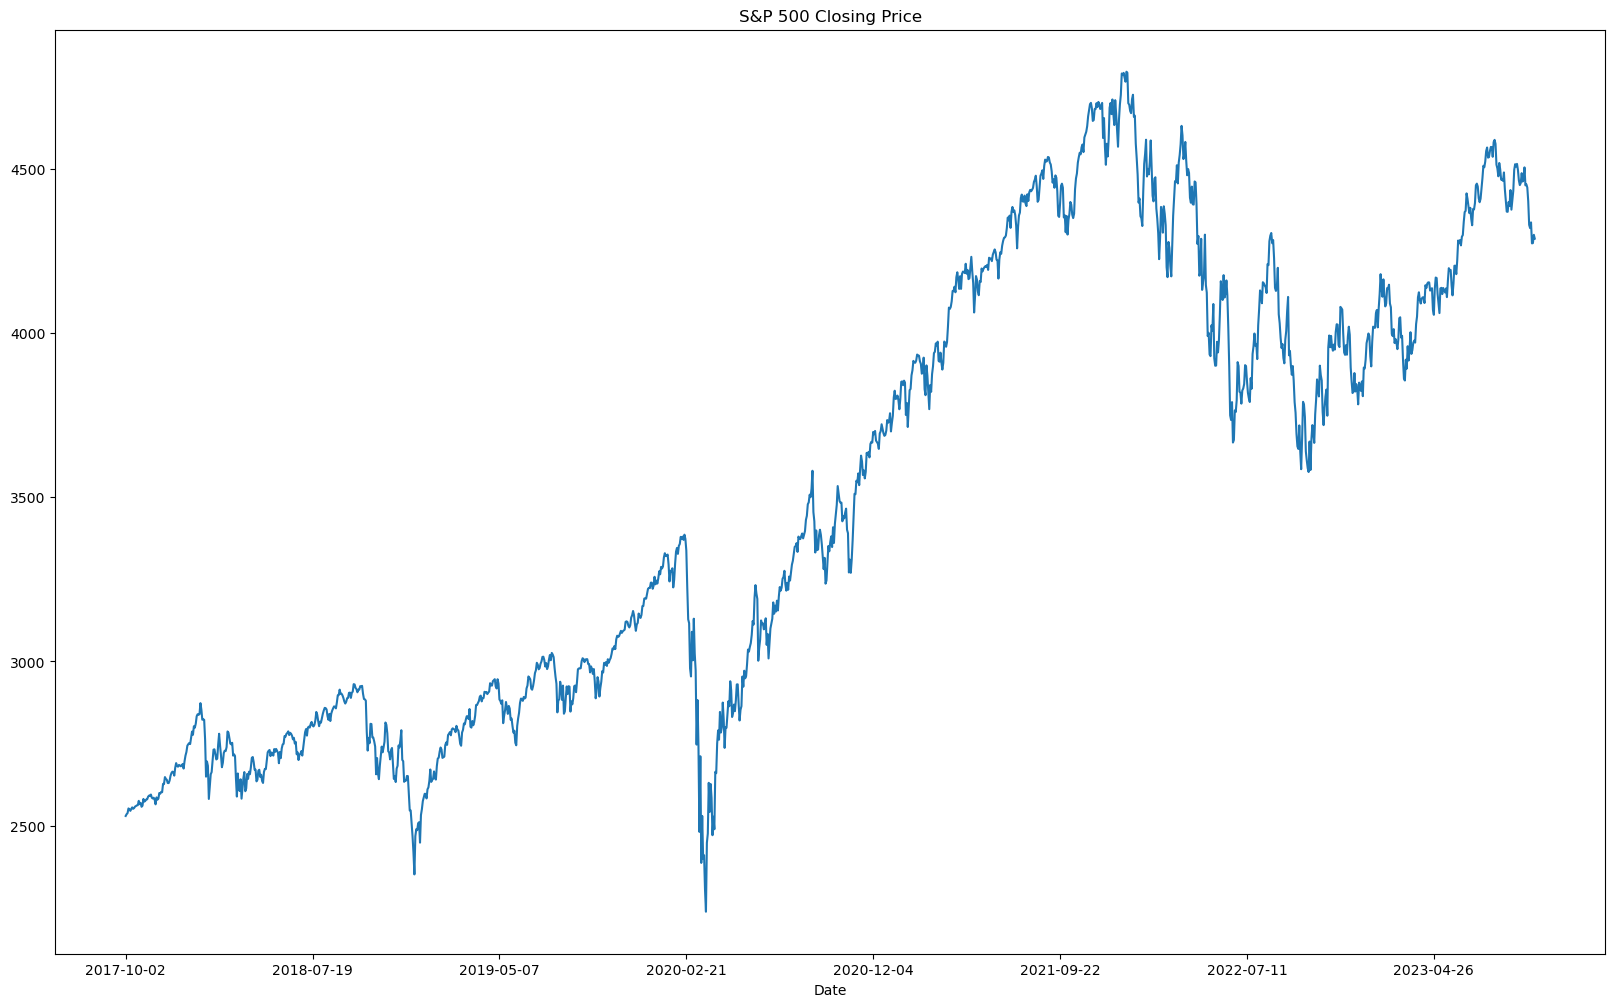

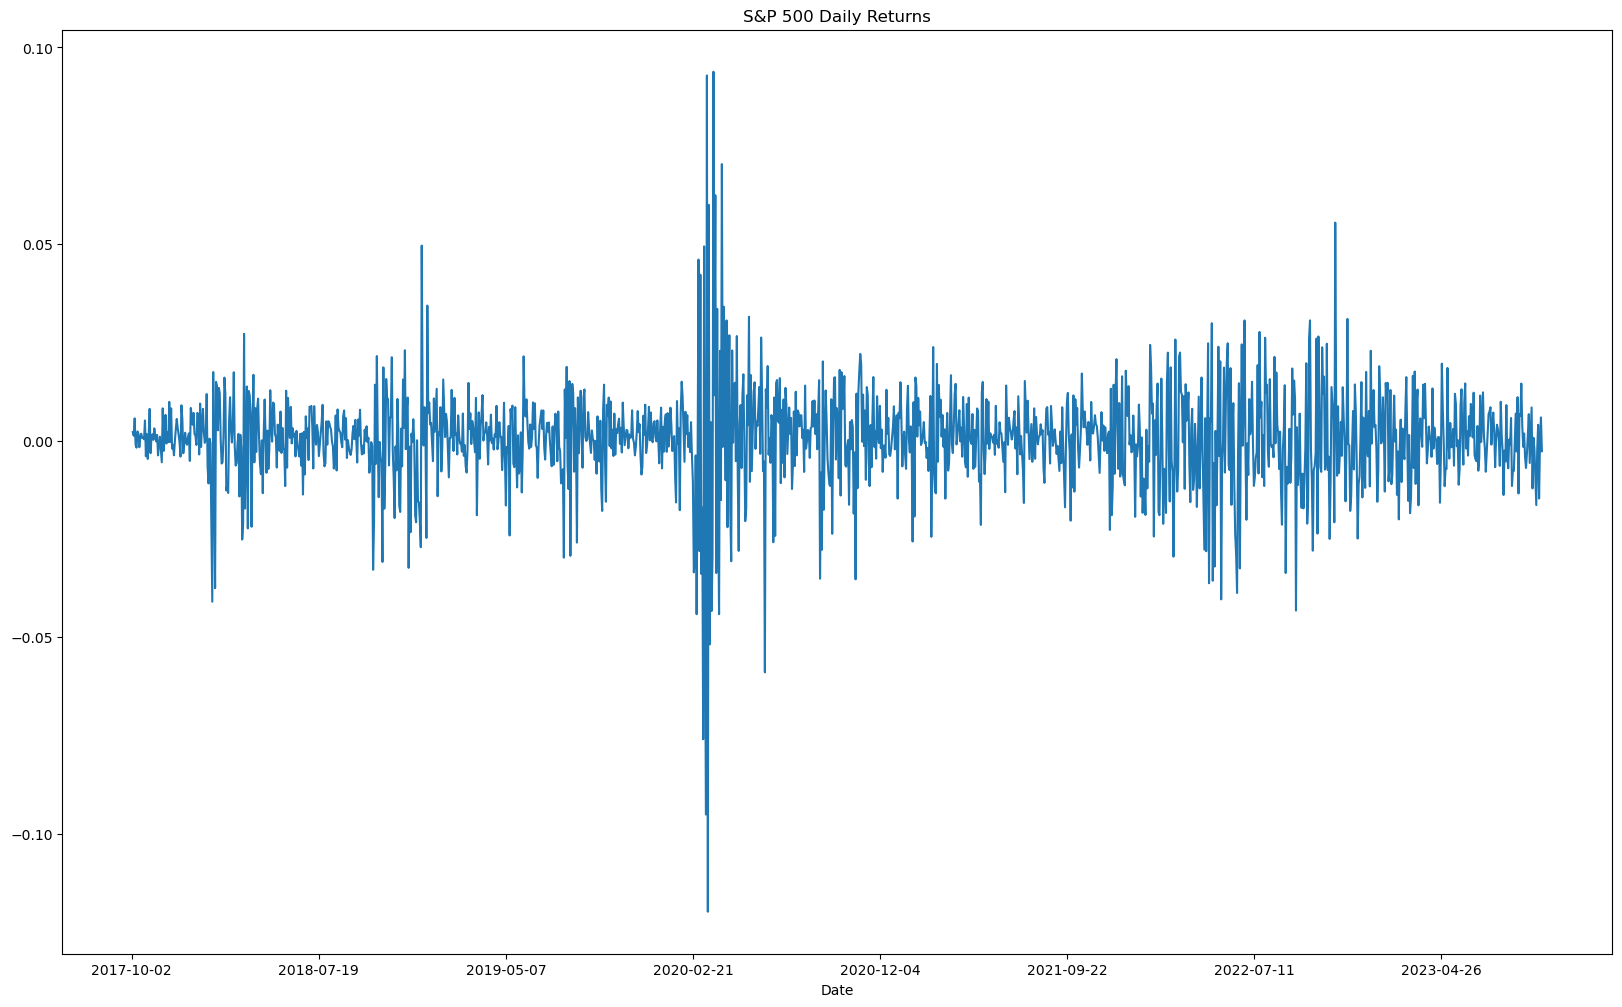

In [21]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate annualized volatility
annualized_volatility = df['Daily_Return'].std() * np.sqrt(252)

# Plotting the closing price
plt.figure(figsize=(20, 12))
df['Close'].plot(title='S&P 500 Closing Price')
plt.show()

# Plotting the daily returns
plt.figure(figsize=(20, 12))
df['Daily_Return'].plot(title='S&P 500 Daily Returns')
plt.show()


In [22]:
# Assuming 'Daily_Return' is already calculated
# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = df['Daily_Return'].std()

# Annualize the daily volatility
annualized_volatility = daily_volatility * np.sqrt(252)  # 252 trading days in a year

# Print the annualized volatility
print("Annualized Volatility of S&P 500:", annualized_volatility)
print("Annualized Volatility of S&P 500 Percentage: {:.2f}%".format(annualized_volatility * 100))

Annualized Volatility of S&P 500: 0.20553685183357429
Annualized Volatility of S&P 500 Percentage: 20.55%


In [23]:
# Calculate the average of the daily returns
average_daily_return = df['Daily_Return'].mean()

# Annualize the average daily return
# There are approximately 252 trading days in a year
average_annual_return = np.power(1 + average_daily_return, 252) - 1

# Print the average annual return
print("Average Annual Return of S&P 500:", average_annual_return)
print("Average Annual Return of S&P 500 Percentage: {:.2f}%".format(average_annual_return * 100))

Average Annual Return of S&P 500: 0.11565219938998683
Average Annual Return of S&P 500 Percentage: 11.57%


In [25]:
# URL for Bitcoin data
bitcoin_url = construct_download_url('BTC-USD', '2017-10-01', '2023-10-01', 'daily')

# Load Bitcoin data into a DataFrame
bitcoin_df = pd.read_csv(bitcoin_url)

# URL for S&P 500 data
sp500_url = construct_download_url('%5EGSPC', '2017-10-01', '2023-10-01', 'daily')

# Load S&P 500 data into a DataFrame
sp500_df = pd.read_csv(sp500_url)

# Ensure that the 'Date' column is in the same format and set as index for both DataFrames
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])
bitcoin_df.set_index('Date', inplace=True)
sp500_df.set_index('Date', inplace=True)

# Calculate daily returns if not already done
bitcoin_df['Daily_Return'] = bitcoin_df['Close'].pct_change()
sp500_df['Daily_Return'] = sp500_df['Close'].pct_change()

# Merge the two DataFrames on the 'Date' column
combined_df = pd.merge(bitcoin_df[['Daily_Return']], sp500_df[['Daily_Return']], left_index=True, right_index=True, how='inner', suffixes=('_btc', '_sp500'))

# Calculate the correlation
correlation = combined_df.corr()
print("Correlation between Bitcoin and S&P 500 Daily Returns:\n", correlation)


Correlation between Bitcoin and S&P 500 Daily Returns:
                     Daily_Return_btc  Daily_Return_sp500
Daily_Return_btc            1.000000            0.283004
Daily_Return_sp500          0.283004            1.000000


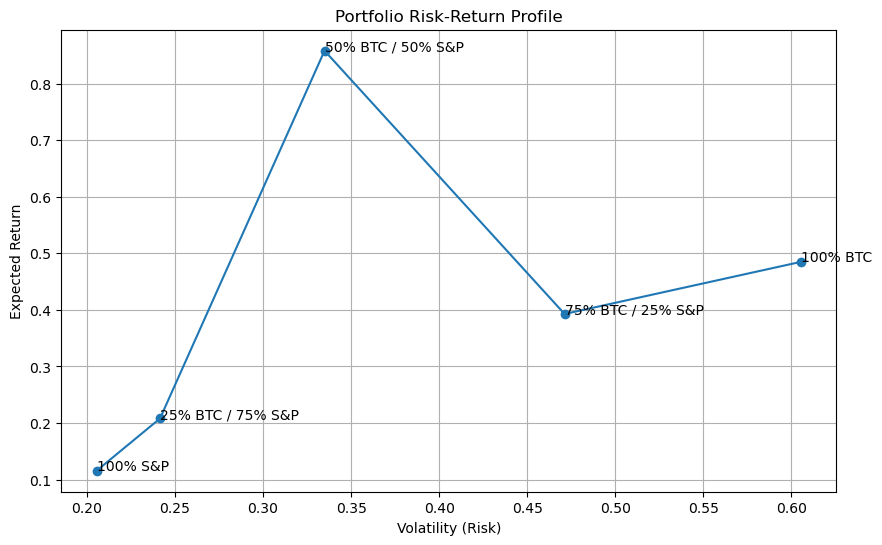

In [26]:
# Example data: replace these with your calculated values
portfolio_mixes = ['100% BTC', '75% BTC / 25% S&P', '50% BTC / 50% S&P', '25% BTC / 75% S&P', '100% S&P']
expected_returns = [0.4851, 0.3928, 0.8583, 0.2081, 0.1157]  # Example expected returns
volatilities = [0.6055, 0.4712, 0.3349, 0.2415, 0.2055]      # Example volatilities

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(volatilities, expected_returns, marker='o')

# Adding labels for each point
for i, txt in enumerate(portfolio_mixes):
    plt.annotate(txt, (volatilities[i], expected_returns[i]))

# Adding titles and labels
plt.title('Portfolio Risk-Return Profile')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.grid(True)

# Show the plot
plt.show()


In [28]:
# Define the expected returns, standard deviation (volatility) for Bitcoin and S&P 500, and the risk-free rate
returns = np.array([0.4851, 0.1157])  # Bitcoin, S&P 500
volatility = np.array([0.6055, 0.2055])  # Bitcoin, S&P 500
correlation = 0.283004  # Replace with your actual data
risk_free_rate = 0.0526  # Approximate current risk-free rate, can vary

# Calculate the covariance matrix
cov_matrix = np.outer(volatility, volatility) * np.array([[1, correlation], [correlation, 1]])

# Define the objective function for maximizing the Sharpe ratio (negative for minimization)
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    p_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    p_vol = np.sqrt(p_var)
    p_ret = np.dot(weights, returns)
    sharpe_ratio = (p_ret - risk_free_rate) / p_vol
    return -sharpe_ratio  # Negative because we need to minimize the function

# Define the constraint (weights must sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define the bounds for the weights (between 0 and 1)
bounds = ((0, 1), (0, 1))

# Initial guess for the weights
initial_weights = np.array([0.5, 0.5])

# Perform the optimization
optimal_portfolio = minimize(negative_sharpe_ratio, initial_weights, args=(returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)

# The optimal weights for the maximum Sharpe ratio
optimal_weights = optimal_portfolio.x

# Calculate the expected return and volatility for the optimal portfolio
optimal_return = portfolio_return(optimal_weights, returns)
optimal_volatility = portfolio_volatility(optimal_weights, cov_matrix)

# Print the results
print(f"Optimal Weights for Maximum Sharpe Ratio: {optimal_weights}")
print(f"Expected Return: {optimal_return}")
print(f"Volatility: {optimal_volatility}")



Optimal Weights for Maximum Sharpe Ratio: [0.66973811 0.33026189]
Expected Return: 0.3631012587576816
Volatility: 0.42969276335126183


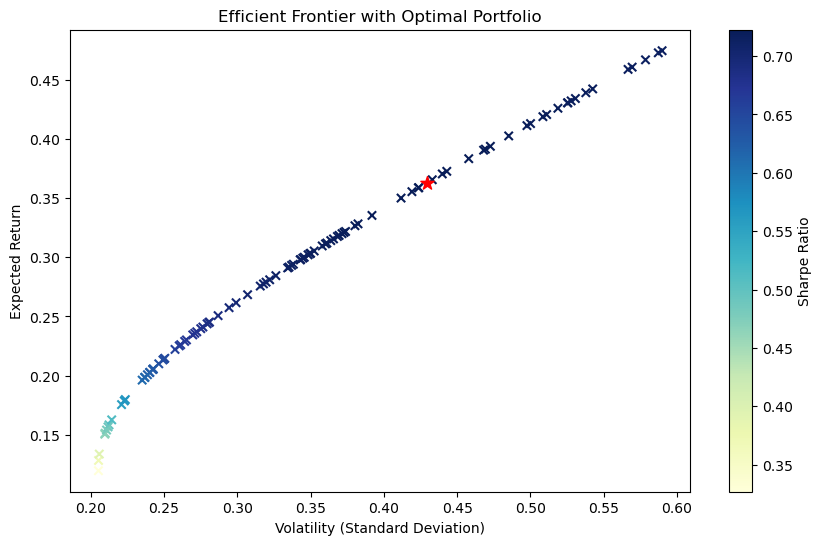

In [30]:
# Define your expected returns, standard deviations, and correlation
returns = np.array([0.4851, 0.1157])  # Bitcoin, S&P 500
volatility = np.array([0.6055, 0.2055])  # Bitcoin, S&P 500
correlation = 0.283004  # Replace with your actual data
cov_matrix = np.outer(volatility, volatility) * np.array([[1, correlation], [correlation, 1]])

# Function to calculate portfolio return and volatility
def get_portfolio_metrics(weights, returns, cov_matrix):
    p_return = np.dot(weights, returns)
    p_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return p_return, p_volatility

# Function to minimize (negative Sharpe Ratio)
def neg_sharpe(weights, returns, cov_matrix, risk_free_rate):
    p_return, p_volatility = get_portfolio_metrics(weights, returns, cov_matrix)
    return -(p_return - risk_free_rate) / p_volatility

# Optimization constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = ((0, 1), (0, 1))
risk_free_rate = 0.0526  # Example risk-free rate

# Generate portfolios for the Efficient Frontier
num_portfolios = 100
eff_returns = []
eff_volatilities = []

for i in range(num_portfolios):
    weights = np.random.random(2)
    weights /= np.sum(weights)
    p_return, p_volatility = get_portfolio_metrics(weights, returns, cov_matrix)
    eff_returns.append(p_return)
    eff_volatilities.append(p_volatility)

# Find the optimal portfolio for max Sharpe Ratio
opt_result = minimize(neg_sharpe, [0.5, 0.5], args=(returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
opt_return, opt_volatility = get_portfolio_metrics(opt_result.x, returns, cov_matrix)

# Plotting the Efficient Frontier and the Optimal Portfolio
plt.figure(figsize=(10, 6))
plt.scatter(eff_volatilities, eff_returns, c=(np.array(eff_returns)-risk_free_rate)/np.array(eff_volatilities), cmap='YlGnBu', marker='x')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(opt_volatility, opt_return, color='red', marker='*', s=100)  # Optimal Portfolio
plt.title('Efficient Frontier with Optimal Portfolio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.show()
